In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score
)
warnings.filterwarnings("ignore")

Text(0, 0.5, 'sigmoid(z)')

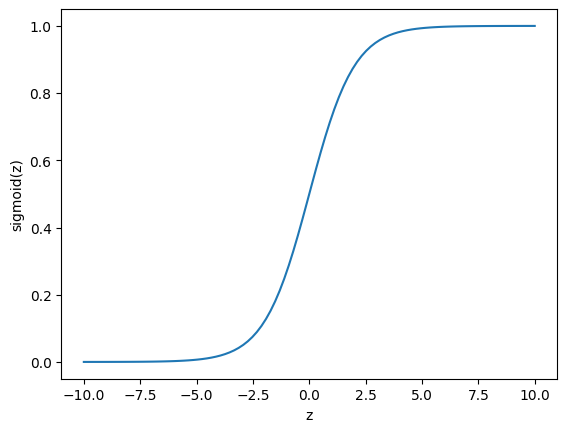

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
X_linesape = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linesape)
plt.plot(X_linesape, Y_hat)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")

In [4]:
X_train = np.load("artifacts/X_train.npz")['arr_0']
X_test = np.load("artifacts/X_test.npz")['arr_0']
y_train = np.load("artifacts/y_train.npz")['arr_0']
y_test = np.load("artifacts/y_test.npz")['arr_0']

In [5]:
seed = 42
np.random.seed(seed)


### Build modal


In [6]:
model_lr = LogisticRegression(
    random_state = 42,
    max_iter=1000,

)
# Fit the model
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

### Inference

In [ ]:
# noramlly threshold is set to 0.5
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [12]:
pd.Series(y_test).value_counts()

0    1607
1     393
Name: count, dtype: int64

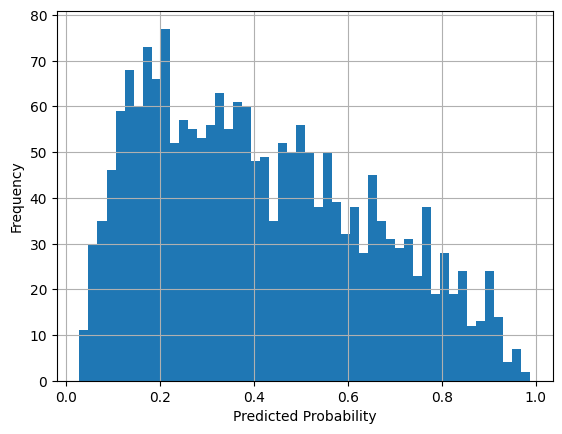

In [18]:
y_lr_test = Y_proba_test[:, 1]

plt.hist(y_lr_test, bins=50)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

lot of values are biased toward 0.2 because of class imbalance in test set

### Evaluation


In [28]:
# threshhold setting
Y_hat_test = y_lr_test > 0.65

This can be optimized using methods like ROC, AUC

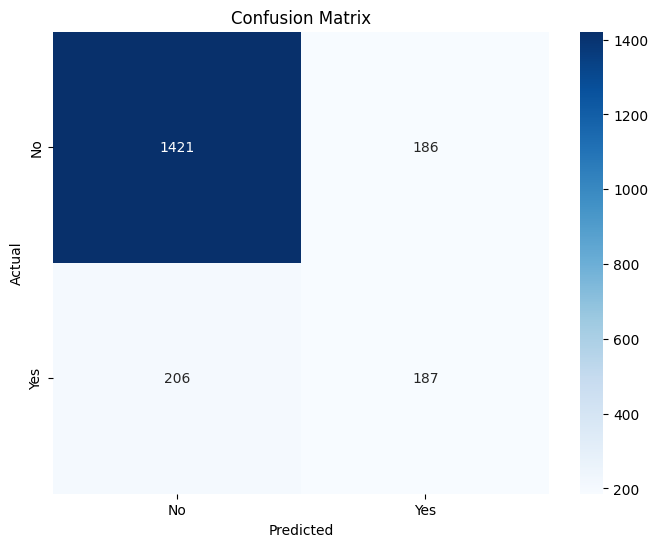

In [29]:
cm = confusion_matrix(y_test, Y_hat_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()